In [9]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

# 3.1 훈련/테스트 데이터 분할
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [13]:
from tensorflow.keras.layers import SimpleRNN

# 4. RNN 모델 정의 및 훈련 (훈련 데이터 사용)
rnn_model = tf.keras.Sequential([
    SimpleRNN(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0397
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.0276e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1797e-04
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.7148e-04
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3871e-04
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0010
Epoch 16/50
32

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
훈련 MSE: 118742.7622
테스트 MSE: 681273.1680


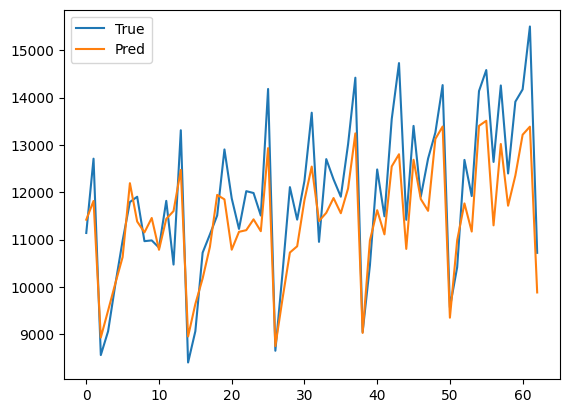

In [14]:
from sklearn.metrics import mean_squared_error

# 5. 예측 및 MSE 계산 (테스트 데이터 사용)
rnn_train_pred = rnn_model.predict(X_train)
rnn_test_pred = rnn_model.predict(X_test)

# 역정규화
rnn_train_pred_inv = scaler.inverse_transform(rnn_train_pred)
y_train_inv = scaler.inverse_transform(y_train)
rnn_test_pred_inv = scaler.inverse_transform(rnn_test_pred)
y_test_inv = scaler.inverse_transform(y_test)

# MSE 계산
rnn_train_mse = mean_squared_error(y_train_inv, rnn_train_pred_inv)
rnn_test_mse = mean_squared_error(y_test_inv, rnn_test_pred_inv)

print(f'훈련 MSE: {rnn_train_mse:.4f}')
print(f'테스트 MSE: {rnn_test_mse:.4f}')

# 6. 결과 시각화 (테스트 데이터)
plt.plot(y_test_inv, label='True')
plt.plot(rnn_test_pred_inv, label='Pred')
plt.legend(); plt.show()

In [15]:
# 4. LSTM 모델 정의 및 훈련 (훈련 데이터 사용)
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0344
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0059
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0049
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0052
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0054
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0050
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0054
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063
Epoch 16/50
32/32 ━━━━━━━━

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
훈련 MSE: 688736.4365
테스트 MSE: 1445357.5296


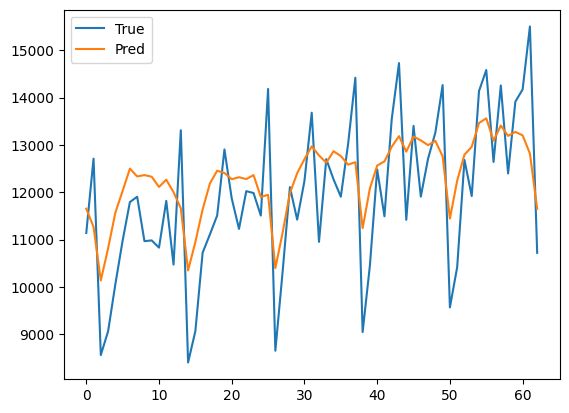

In [16]:
from sklearn.metrics import mean_squared_error

# 5. 예측 및 MSE 계산 (테스트 데이터 사용)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# 역정규화
train_pred_inv = scaler.inverse_transform(train_pred)
y_train_inv = scaler.inverse_transform(y_train)
test_pred_inv = scaler.inverse_transform(test_pred)
y_test_inv = scaler.inverse_transform(y_test)

# MSE 계산
train_mse = mean_squared_error(y_train_inv, train_pred_inv)
test_mse = mean_squared_error(y_test_inv, test_pred_inv)

print(f'훈련 MSE: {train_mse:.4f}')
print(f'테스트 MSE: {test_mse:.4f}')

# 6. 결과 시각화 (테스트 데이터)
plt.plot(y_test_inv, label='True')
plt.plot(test_pred_inv, label='Pred')
plt.legend(); plt.show()

In [18]:
print("--- 모델 성능 비교 ---")
print(f"RNN 모델 훈련 MSE: {rnn_train_mse:.4f}")
print(f"RNN 모델 테스트 MSE: {rnn_test_mse:.4f}")
print(f"LSTM 모델 훈련 MSE: {train_mse:.4f}")
print(f"LSTM 모델 테스트 MSE: {test_mse:.4f}")

--- 모델 성능 비교 ---
RNN 모델 훈련 MSE: 118742.7622
RNN 모델 테스트 MSE: 681273.1680
LSTM 모델 훈련 MSE: 688736.4365
LSTM 모델 테스트 MSE: 1445357.5296
